In [38]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
from seaborn.distributions import distplot
import platform
from scipy import stats

In [6]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
### Paired Sample t-test
# 하나의 집단에서 보통 전(before)/후(after)의 관계를 확인 할 때 사용
# 사용되는 함수 : ttest_rel(x,y)
# x = before, y = after
# 검증 : p-value > 0.05(전후 상관없음 = 차이없음)
#      : p-value <= 0.05(전후 상관있음 = 차이있음)

### 예시 1 - 야식을 먹기 전/후의 몸무게 차이 검정
- 귀무가설 : 야식을 먹기 전/후의 몸무게의 차이가 없다.
- 대립가설 : 야식을 먹기 전/후의 몸무게의 차이가 있다.

In [31]:
# 야식 복용 전 몸무게 랜덤 생성
beforeWeights = np.random.randint(low=40, high=90, size=20)
beforeWeights

array([85, 60, 73, 89, 68, 59, 84, 41, 68, 76, 45, 52, 72, 76, 56, 84, 52,
       57, 88, 54])

In [35]:
# 야식 복용 후 몸무게 랜덤 생성
temp_list = []
for weight in beforeWeights:
    # 0.99-0.02 ~ 0.99+0.02
    temp_list.append((weight* np.random.normal(0.99, 0.02)))
afterWeights = np.array(temp_list)
afterWeights

array([84.27431873, 59.24092047, 70.94378216, 86.68992087, 67.04810199,
       58.08714204, 83.97827078, 40.40176139, 66.68859856, 77.10005717,
       43.82379763, 51.32942708, 71.72785667, 78.91550487, 56.70316075,
       80.47522531, 52.18632197, 56.7342461 , 86.82833038, 54.40331873])

In [37]:
# 야식 복용 전/후 검증하기
result = stats.ttest_rel(beforeWeights, afterWeights)
print('검정 결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result))

# 검증결과
# 1. p-value = 0.072 => 0.05 이므로 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터의 차이가 있다.
#                    야식을 먹기 전/후 몸무게에는 차이가 있다.

검정 결과 = Ttest_relResult(statistic=1.904969820189949, pvalue=0.07203403823972412)
검정 통계량 = 1.905, p-value = 0.072


### 예시 2 - 특강을 듣기 전/후의 시험점수 차이 검정
- 귀무가설 : 특강을 듣기 전/후의 시험점수의 차이가 없다.
- 대립가설 : 특강을 듣기 전/후의 시험점수의 차이가 있다.

In [106]:
# 데이터 생성하기(랜덤 값 시드(seed) 임의로 설정
# 특강 전 데이터 : 랜덤하게 80을 기준으로 +-10, 100개 생성
# 특강 후 데이터 : 랜덤하게 77을 기준으로 +-10, 100개 생성
# 정규성 검사
# 정규성 시각화
# 전/후 검정
# 검증결과

In [176]:
# np.random.seed(123)
# beforeScore = np.random.normal(80, 10, 100)
# print('특강 전 점수 :', beforeScore)
# print()
# afterScore = np.random.normal(77, 10, 100)
# print('특강 후 점수 :', afterScore)
# print()

In [173]:
# 특강 전 데이터
beforeScore = np.random.randint(low=70, high=90, size=100)
beforeScore

array([83, 86, 70, 83, 82, 74, 72, 82, 71, 80, 75, 77, 87, 87, 73, 76, 81,
       88, 88, 70, 85, 70, 76, 81, 80, 82, 84, 77, 85, 70, 78, 86, 75, 77,
       88, 73, 71, 86, 73, 78, 87, 74, 78, 88, 70, 84, 89, 76, 87, 81, 88,
       86, 80, 85, 84, 70, 82, 78, 78, 74, 71, 71, 79, 81, 72, 78, 89, 70,
       88, 88, 83, 78, 76, 77, 72, 74, 74, 83, 71, 80, 87, 85, 87, 74, 80,
       84, 77, 73, 73, 73, 87, 76, 78, 87, 71, 77, 74, 78, 75, 75])

In [177]:
afterScore = np.random.randint(low=67, high=87, size=100)
afterScore

array([85, 82, 77, 67, 84, 83, 78, 79, 71, 69, 71, 79, 69, 84, 84, 79, 68,
       86, 70, 81, 69, 86, 86, 85, 83, 78, 85, 86, 82, 67, 78, 86, 85, 76,
       74, 80, 69, 79, 80, 85, 77, 77, 84, 84, 79, 78, 78, 84, 84, 73, 85,
       68, 73, 76, 85, 81, 82, 82, 70, 71, 72, 86, 68, 77, 79, 69, 67, 74,
       68, 83, 83, 81, 84, 69, 69, 70, 68, 78, 77, 78, 83, 67, 68, 78, 74,
       86, 80, 81, 67, 68, 76, 73, 74, 74, 72, 83, 76, 70, 80, 81])

In [174]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

beforeSh = stats.shapiro(beforeScore)
print('정규성 검정 결과 =', beforeSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(beforeSh))

# 1. p-value = 0.336 >= 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9361243844032288, pvalue=0.00011273986456217244)
검정 통계량 = 0.936, p-value = 0.000


In [178]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

afterSh = stats.shapiro(afterScore)
print('정규성 검정 결과 =', afterSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(afterSh))

# 1. p-value = 0.336 >= 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9191433191299438, pvalue=1.2679867722908966e-05)
검정 통계량 = 0.919, p-value = 0.000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


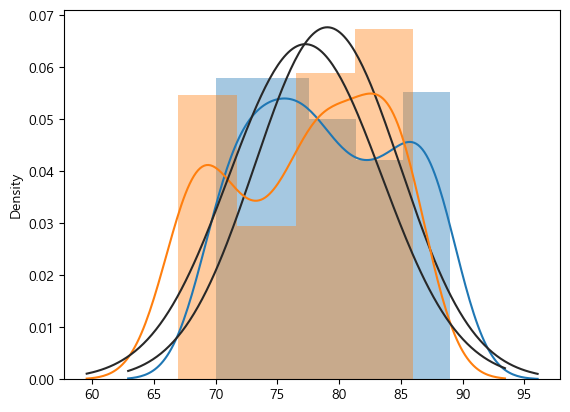

In [179]:
sns.distplot(beforeScore, fit=stats.norm)
sns.distplot(afterScore, fit=stats.norm)
plt.show()

In [180]:
# levene(레빈) 방법
sLevene = stats.levene(beforeScore, afterScore)

print('등분산성 levene 검증결과 = ', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))

# 1. p-value = 0.663 => 0.05 이므로 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  LeveneResult(statistic=0.19086360963572072, pvalue=0.6626748817056749)
t-검정 통계량 = 0.191, p-value = 0.663


In [183]:
# 야식 복용 전/후 검증하기
result = stats.ttest_rel(beforeScore, afterScore)
print('검정 결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result))

# 검증결과
# 1. p-value = 0.035 < 0.05 이므로 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터의 차이가 있다.
#                    특강을 듣기 전/후 시험점수에는 차이가 있다.

검정 결과 = Ttest_relResult(statistic=2.1362858930241706, pvalue=0.035121446019848575)
검정 통계량 = 2.136, p-value = 0.035


### 예시 3 - 환자 9명의 복부 수술 전/후 몸무게 변화에 대한 차이 검정
- 귀무가설 : 복부 수술 전/후 몸무게 변화가 없다.
- 대립가설 : 복부 수술 전/후 몸무게 변화가 있다.

In [189]:
# 데이터 생성
np.random.seed(11)
beforeWeight = np.random.randint(low= 40, high=90, size=9)
afterWeight = [64.2, 55.1, 66.5, 56, 54.8, 50.7, 73.1, 45.2, 55]
print(beforeWeight)
print(afterWeight)

[65 56 67 57 53 52 73 47 58]
[64.2, 55.1, 66.5, 56, 54.8, 50.7, 73.1, 45.2, 55]


In [190]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

weightSh = stats.shapiro(beforeWeight)
print('정규성 검정 결과 =', weightSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(weightSh))

# 1. p-value = 0.808 > 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9609687924385071, pvalue=0.8084063529968262)
검정 통계량 = 0.961, p-value = 0.808


In [192]:
# 정규성 검정
# 검증시 대부분의 집단은 정규분포를 따른다는 가정하에 진행
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 따른다

weightSh = stats.shapiro(afterWeight)
print('정규성 검정 결과 =', weightSh)
print('검정 통계량 = %.3f, p-value = %.3f' %(weightSh))

# 1. p-value = 0.590 > 0.05 이므로 정규성을 만족한다

정규성 검정 결과 = ShapiroResult(statistic=0.9407998323440552, pvalue=0.5903438329696655)
검정 통계량 = 0.941, p-value = 0.590


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


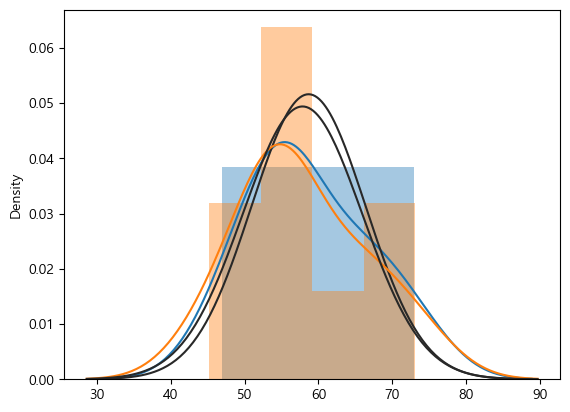

In [193]:
sns.distplot(beforeWeight, fit=stats.norm)
sns.distplot(afterWeight, fit=stats.norm)
plt.show()

In [195]:
# 복부 수술 전/후 검증하기
result = stats.ttest_rel(beforeWeight, afterWeight)
print('검정 결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result))

# 검증결과
# 1. p-value = 0.097 < 0.05 이므로 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터의 차이가 있다.
#                    복부 수술 전/후 몸무게는 차이가 있다.

검정 결과 = Ttest_relResult(statistic=1.8783904054971974, pvalue=0.09714571631672811)
검정 통계량 = 1.878, p-value = 0.097
